## Assignment: predicting house prices

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

* Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

```python
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
```

* Please follow the example above and call `engine.dispose()` when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
* Investigate the data, and do any necessary data cleaning.
* Explore the data and find some variables that you think would be useful in predicting house prices.
* Build your initial model using these features and estimate the parameters using OLS.






### Load the dataset from the Thinkful PostgreSQL database. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

### Investigate the data, and do any necessary data cleaning

In [2]:
houses_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


All null values are in yellow


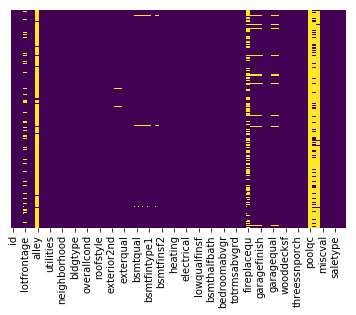

In [3]:
print('All null values are in yellow')
sns.heatmap(houses_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#Identifying columns with a lot of null values

x = (houses_df.isnull().sum()*100)/houses_df.saleprice.count()
columnstoRemove = []
columnstoConsider = []

for value,column in zip(x,x.index):
    
    if value >= 20:       
        print('Column {} with HIGH {}%  of null values'.format(column,round(value,2)))
        columnstoRemove.append(column)
    elif 0 < value < 20:
        print('Column {} with low {}%  of null values'.format(column,round(value,2)))
        columnstoConsider.append(column)
    
    
print('Columns to be removed from dataset:',columnstoRemove)
print('Columns with a few null values to be removed:',columnstoConsider)


Column lotfrontage with low 17.74%  of null values
Column alley with HIGH 93.77%  of null values
Column masvnrtype with low 0.55%  of null values
Column masvnrarea with low 0.55%  of null values
Column bsmtqual with low 2.53%  of null values
Column bsmtcond with low 2.53%  of null values
Column bsmtexposure with low 2.6%  of null values
Column bsmtfintype1 with low 2.53%  of null values
Column bsmtfintype2 with low 2.6%  of null values
Column electrical with low 0.07%  of null values
Column fireplacequ with HIGH 47.26%  of null values
Column garagetype with low 5.55%  of null values
Column garageyrblt with low 5.55%  of null values
Column garagefinish with low 5.55%  of null values
Column garagequal with low 5.55%  of null values
Column garagecond with low 5.55%  of null values
Column poolqc with HIGH 99.52%  of null values
Column fence with HIGH 80.75%  of null values
Column miscfeature with HIGH 96.3%  of null values
Columns to be removed from dataset: ['alley', 'fireplacequ', 'poolq

In [5]:
#Dropping columns from dataset

#Running just once 
#Uncomment this line
#houses_df=houses_df.drop(columnstoRemove,axis=1)


#I'll analyze these variables later: 'garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond'
#meanwhile I'll remove those columns from columnstoConsider list

#Uncomment this line
#for i in ['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond']:
#    columnstoConsider.remove(i)

#Dropping rows with null values from columns with low percentage of null values

#Uncomment this line
#houses_df = houses_df.dropna(subset=columnstoConsider)

houses_df[['garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond']]

,garagetype,garageyrblt,garagefinish,garagequal,garagecond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
5,Attchd,1993.0,Unf,TA,TA
6,Attchd,2004.0,RFn,TA,TA
7,Attchd,1973.0,RFn,TA,TA
8,Detchd,1931.0,Unf,Fa,TA
9,Attchd,1939.0,RFn,Gd,TA


All null values are in yellow


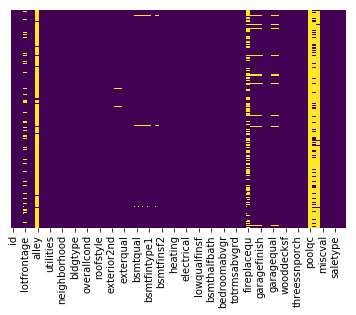

In [6]:
print('All null values are in yellow')
sns.heatmap(houses_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Explore the data and find some variables that you think would be useful in predicting house prices

In [7]:
#Getting list of categorical and noncategorical features

nonCategorical = []
categorical = []

for column in houses_df.columns:
    if len(houses_df[column].unique()) < 20:
        categorical.append(column)
    else:
        nonCategorical.append(column)
        


In [8]:
#Verifying lists

houses_df.neighborhood.unique()

#categorical.append('neighborhood')
#nonCategorical.remove('neighborhood')


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

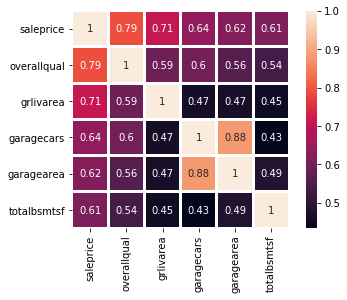

In [9]:
#Detecting correlation

correlation = houses_df[nonCategorical].corr()
#print(correlation['saleprice'])
x=correlation['saleprice']
new_nonCategorical = []

for index,value in zip(x.index,x):
    if (value >= 0.48) or (value <= -0.48):
        #print(index,value)
        new_nonCategorical.append(index)


#Checking correlation

new_nonCategorical=['saleprice','overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']

correlation_2 = houses_df[new_nonCategorical].corr()
sns.heatmap(correlation_2, square=True, annot=True, linewidths=2)


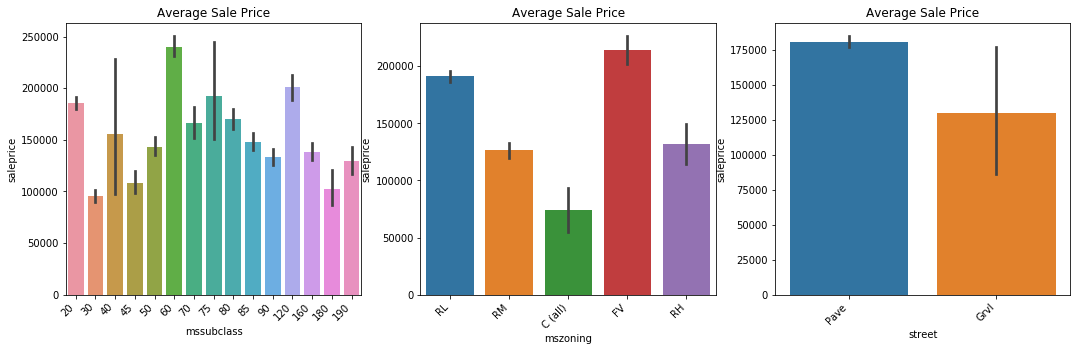

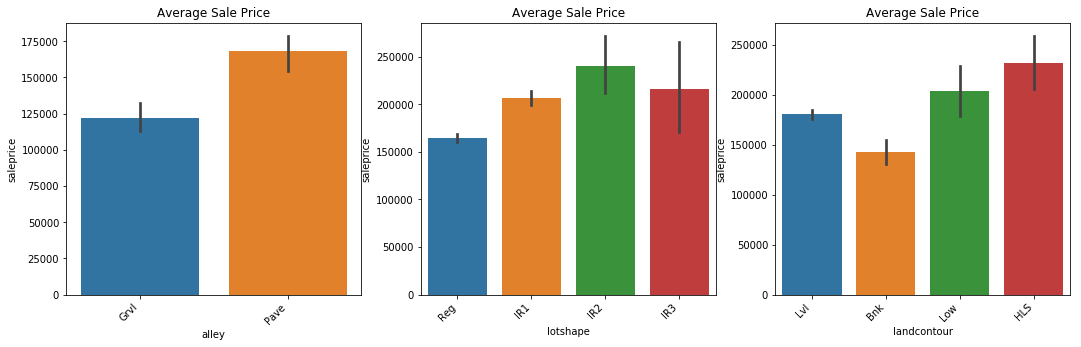

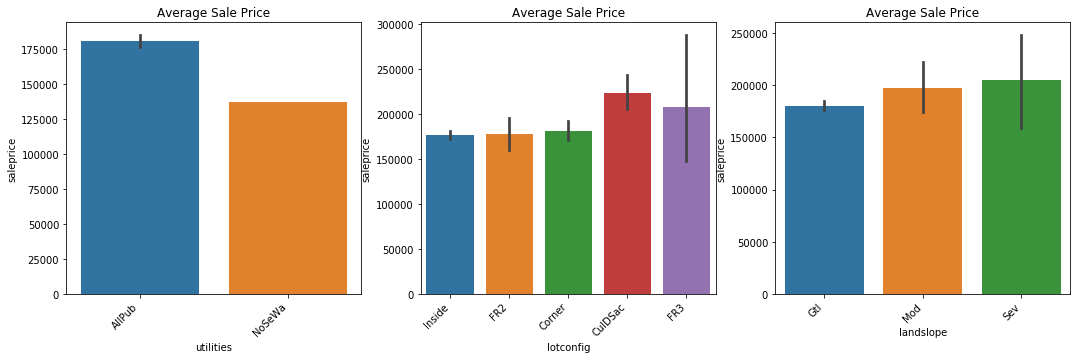

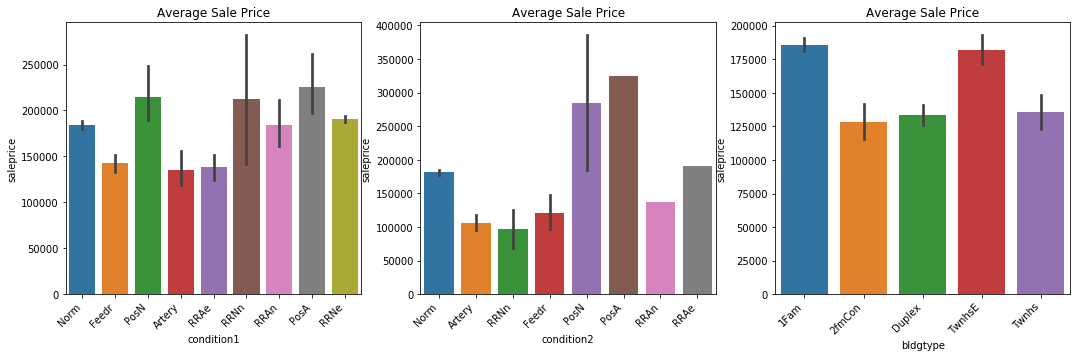

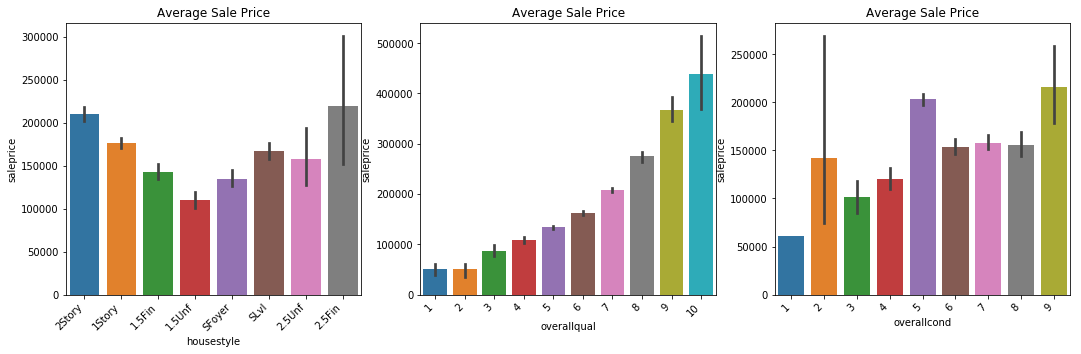

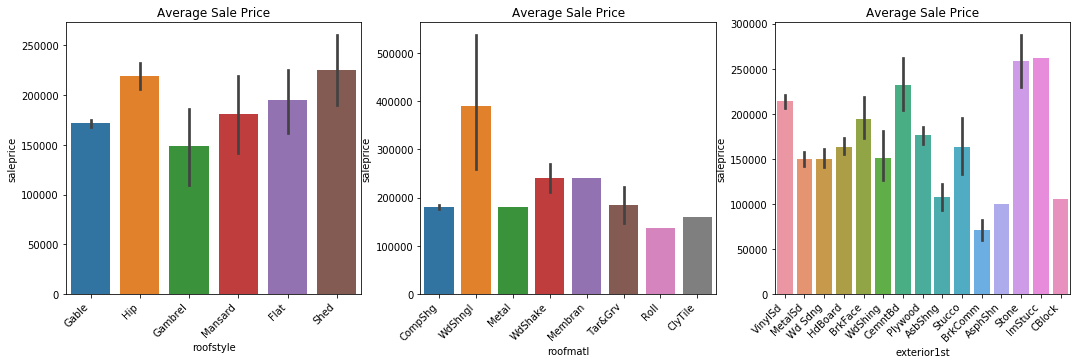

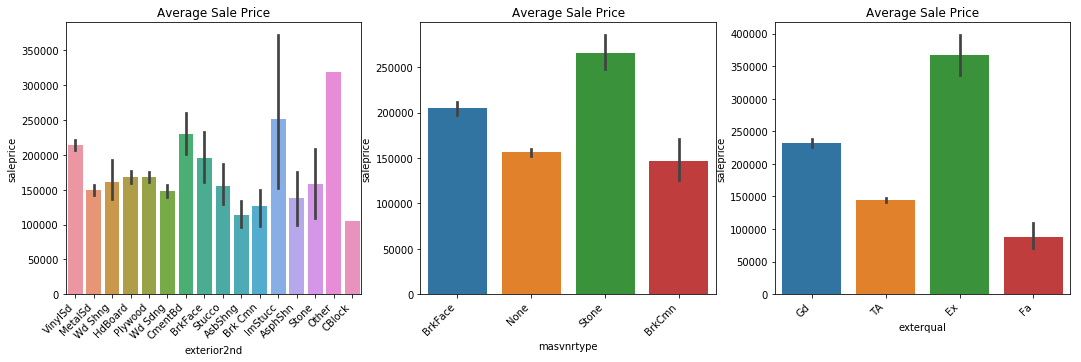

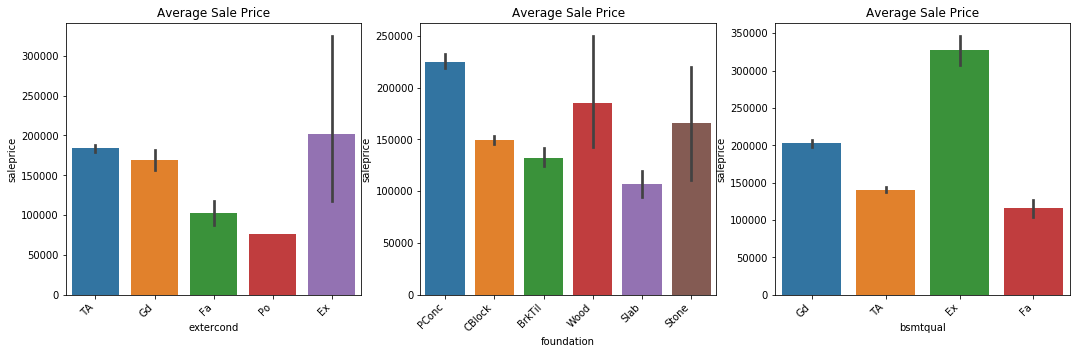

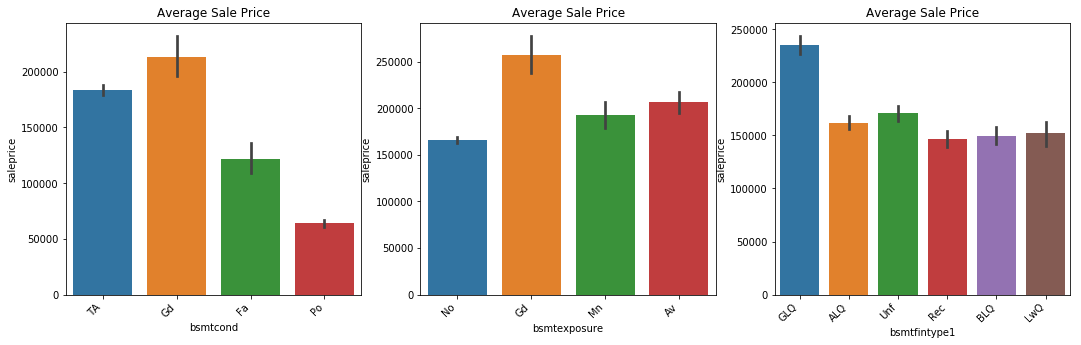

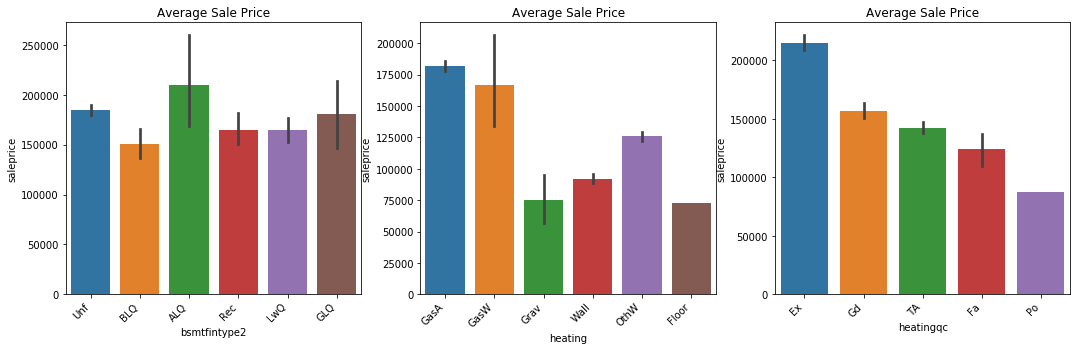

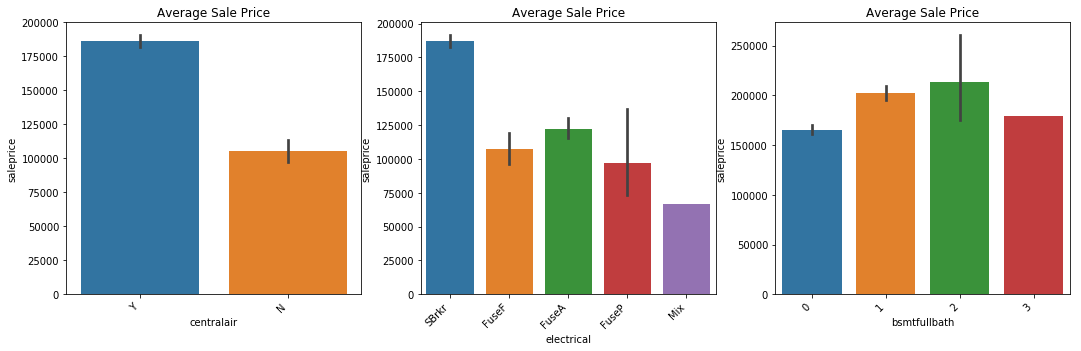

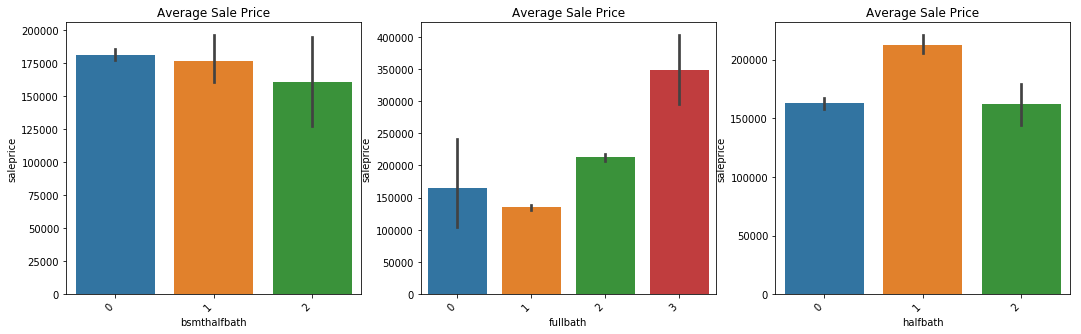

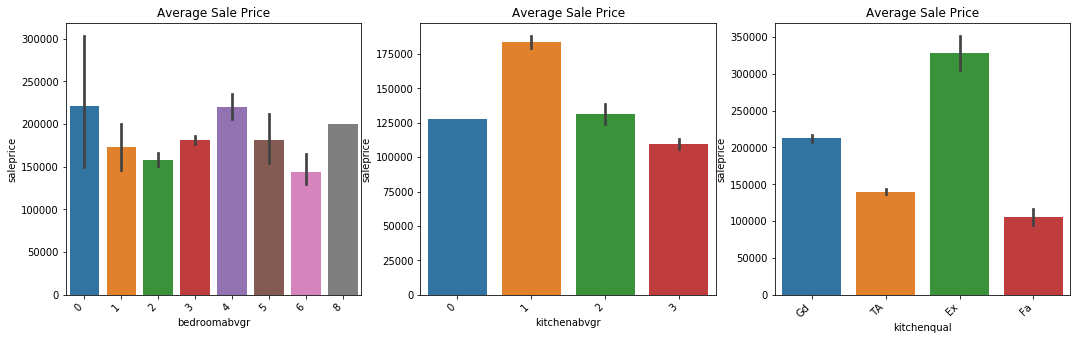

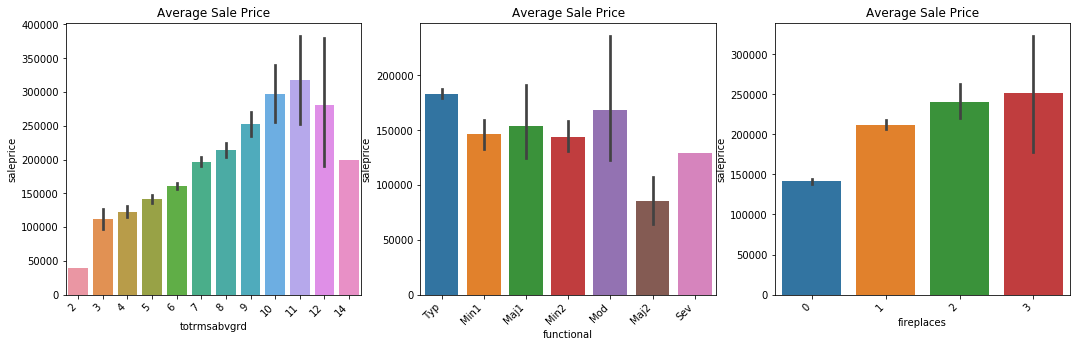

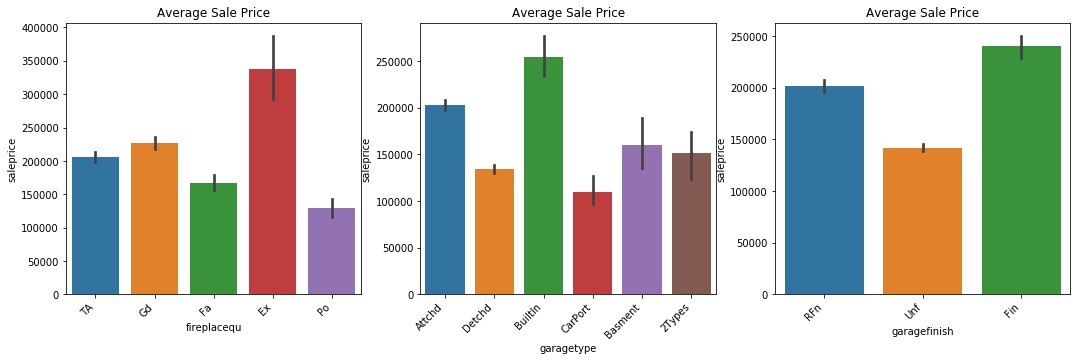

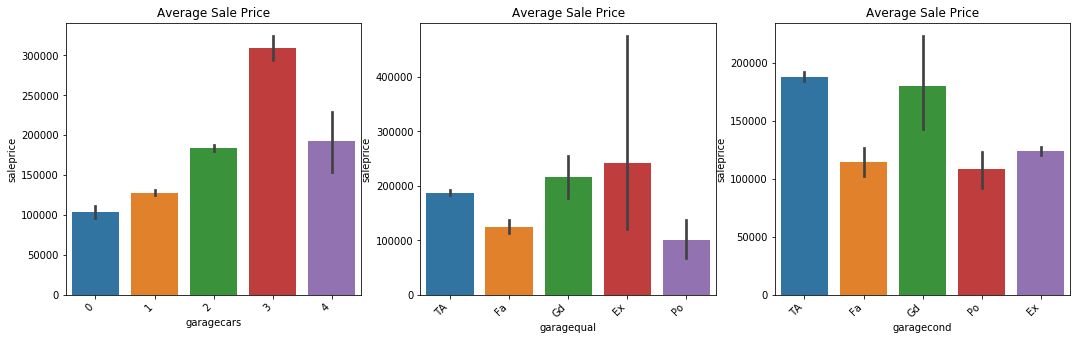

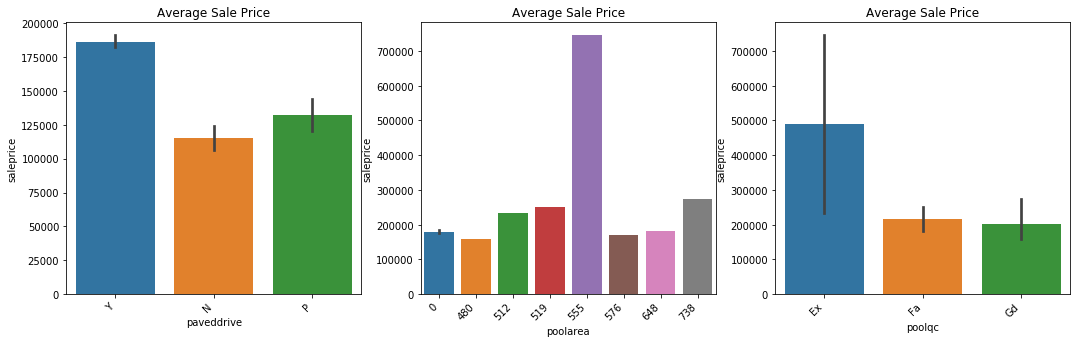

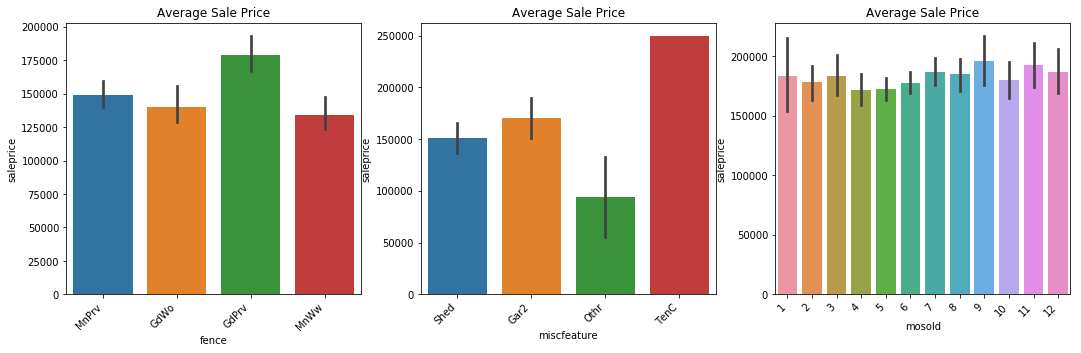

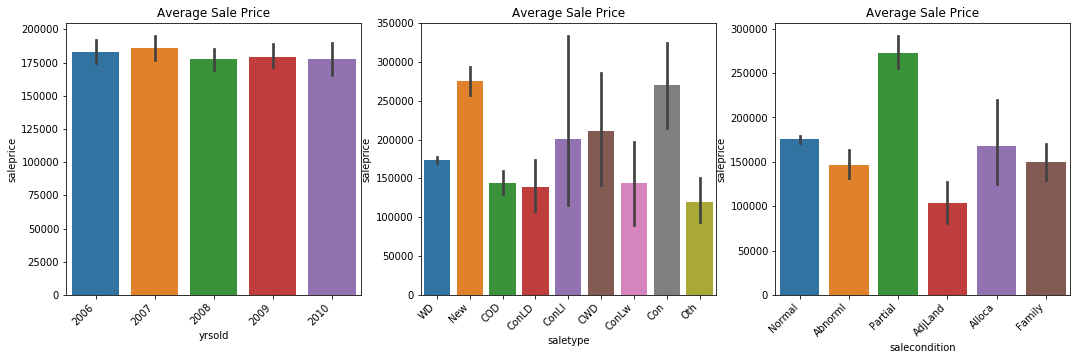

In [10]:
#Creating bar plot to analizes categorical variables

i=0

while i < len(categorical):


    plt.figure(figsize=(18,5))

    plt.subplot(1,3,1)
    # draw the heatmap using seaborn.
    sns.barplot(houses_df[categorical[i]], houses_df['saleprice'])
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title('Average Sale Price')

    if i+1 < len(categorical):
        plt.subplot(1,3,2)
        # draw the heatmap using seaborn.
        sns.barplot(houses_df[categorical[i+1]], houses_df['saleprice'])
        plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.title('Average Sale Price')
        
    if i+2 < len(categorical):

        plt.subplot(1,3,3)
        # draw the heatmap using seaborn.
        sns.barplot(houses_df[categorical[i+2]], houses_df['saleprice'])
        plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.title('Average Sale Price')
        
    plt.show()

    i+=3


**Based on visualizations above, I'll select categorical variables for the model**


In [11]:
houses_df = pd.concat([houses_df,pd.get_dummies(houses_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houses_df = pd.concat([houses_df,pd.get_dummies(houses_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houses_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houses_df.street, prefix="street", drop_first=True).columns)


In [14]:
new_houses = houses_df[['saleprice','overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

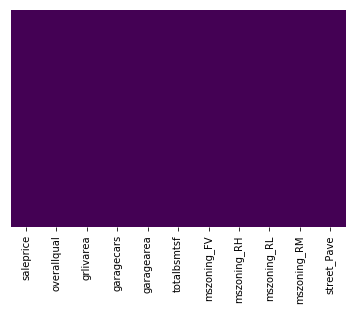

In [15]:
#Verifying if there are some missing values

nonclean = ((new_houses.isnull().sum()*100)/houses_df.saleprice.count())

for value,index in zip(nonclean,nonclean.index):
    if value > 0:
        print('Column: {} with {}% of null values'.format(index,value))


#Cleaning garageyrblt by replacing missing values in a column with a value from yearremodadd because they are high correlated.

sns.heatmap(new_houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')



### Build Regression Model using these features and estimate the parameters using OLS

In [323]:
#Creating feature set for X

featureset = list(new_houses.columns)
print(featureset)

featureset.remove('saleprice')

# Y is the target variable
Y = new_houses['saleprice']

# X is the feature set which includes
# is_male and is_smoker variables


X = new_houses[featureset]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM', 'street_Pave']

Coefficients: 
 [2.33265353e+04 4.56343565e+01 1.34501364e+04 1.64082048e+01
 2.83816393e+01 2.50875137e+04 1.34204564e+04 2.85658560e+04
 9.04778936e+03 1.51037622e+02]

Intercept: 
 -117337.72871399348


In [324]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:09:39   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <Font color=blue>Assumption 1: Linearity of the model in its coefficients</font> 

The target variable should be a linear function of the model's coefficients

-------------------------------------------------
<font color=gray>
By: Wendy Navarrete
8/8/2019